In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pickle#5 as pickle
import pandas as pd
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def neural_autoencoder_np(X, weights, biases ):
    num_layers = len(weights) + 1  
    H=X
    for l in range(0,num_layers-2):
        W = weights[l]
        b = biases[l]
        H = np.tanh(np.add(np.matmul(H, W), b))
    W = weights[-1]
    b = biases[-1]
    H =  (np.add(np.matmul(H, W), b))
    return H

In [3]:
def neural_autoencoder(X, weights, biases ):
    num_layers = len(weights) + 1  
    H=X
    for l in range(0,num_layers-2):
        W = weights[l]
        b = biases[l]
        H = tf.nn.tanh(tf.add(tf.matmul(H, W), b))
    W = weights[-1]
    b = biases[-1]
    H =  (tf.add(tf.matmul(H, W), b))
    return H

In [4]:
def neural_low(X, weights_encoder, biases_encoder,weights_L):
    X_low_PCA=tf.matmul(X, weights_L)  
    X_low_encoder= neural_autoencoder(X,weights_encoder, biases_encoder)
    X_low= X_low_PCA+X_low_encoder
    X_gradient_Z2=tf.gradients(tf.abs(X_low[:,0] ),X)[0]
    X_gradient_Z3=tf.gradients(tf.abs( X_low[:,1]),X)[0]
    return X_gradient_Z2,X_gradient_Z3

In [5]:
def neural_low_np(X, weights_encoder, biases_encoder,weights_L):
    X_low_PCA= X@weights_L 
    X_low_encoder= neural_autoencoder_np(X,weights_encoder, biases_encoder)
    X_low= X_low_PCA+X_low_encoder 
    return X_low

In [6]:
data_learn=pickle.load(open('../saved_checkpoints/hyper100000.pkl', 'rb'))
weights_encoder = data_learn["weights_encoder"]
biases_encoder =  data_learn["biases_encoder"]
weights_L = data_learn["weights_L"][0]

In [7]:
dic='../data'
path = dic+'/config_train_mean_every.pkl'
data=pickle.load(open(path,'rb'))

In [8]:
data['Trajectory800'].shape

(3003, 300)

In [9]:
n=50
tra =data['Trajectory101'][3*n:3*(n+1),:]
ex_mean,ex_std= 208.21994500581388 ,69.79624239435213
#tra[0,:]=(tra[0,:]-ex_mean)/ex_std
tra1=np.reshape(tra.T,[1,900])

In [11]:
n=500
tra =data['Trajectory601'][3*n:3*(n+1),:]
ex_mean,ex_std= 208.21994500581388 ,69.79624239435213
#tra[0,:]=(tra[0,:]-ex_mean)/ex_std
tra1=np.reshape(tra.T,[1,900])

In [12]:
X_low_PCA= tra1@weights_L 
X_low_encoder= neural_autoencoder_np(tra1,weights_encoder, biases_encoder)

In [13]:
X_low_PCA,X_low_encoder

(array([[0.32109562, 5.02478452]]), array([[ 0.00215196, -0.27568551]]))

In [14]:
weights_L 

array([[-1.21964e-04,  1.07218e-03],
       [ 1.64560e-07, -5.12460e-07],
       [-1.98266e-07,  2.73699e-04],
       ...,
       [ 1.19131e-04,  1.08556e-03],
       [-8.02981e-08,  3.27310e-06],
       [ 5.29741e-07, -3.13671e-04]], dtype=float32)

In [15]:
# X_low_PCA=np.matmul(tra1, weights_L)  
# X_low_encoder=neural_autoencoder_np(tra1, weights_encoder , biases_encoder  )

In [16]:
# X_low_encoder= neural_autoencoder(X,weights_encoder, biases_encoder)
# X_low=X_low_PCA+X_low_encoder
# X_gradient=tf.gradients(X_low,X)[0]

In [17]:
X_tf=tf.cast(tra1,dtype=np.float32, name=None )  

In [18]:


config = tf.ConfigProto()
config.gpu_options.allow_growth = True

min_loss = 1e16
with tf.Session(config=config) as sess:
    u_x_pred = neural_low(X_tf, weights_encoder, biases_encoder,weights_L)
    #u_y_pred = net_f(xf_tf,yf_tf, weights, biases,gamma  )[2]
    #ut0=sess.run(u_pred1) 
    u_x_Z2=sess.run(u_x_pred[0])
    u_x_Z3=sess.run(u_x_pred[1])
    #u_y=sess.run(u_y_pred)
    #np.savetxt('./result/u_t_opt_all-mat.txt',np.array(ut0),fmt='%10.5e')
    #np.savetxt('u_x.txt',np.array(u_x),fmt='%10.5e') 
    #np.savetxt('./result/u_y_opt_all-mat.txt',np.array(u_y),fmt='%10.5e') 

In [19]:
# plt.plot(u_x_Z2[0],'r.')

In [20]:
a=np.linspace(0,897,300,dtype=int)

In [21]:
# plt.plot(u_x_Z3[0][:],'r.')

In [22]:
tra1=np.reshape(tra.T,[1,900])

In [23]:
epsilon=100
tra1_per_add=tra1+epsilon*u_x_Z2/np.sqrt(  np.sum(u_x_Z2**2)  )
tra_per_add=(np.reshape(tra1_per_add,[300,3])).T

tra1_per_minus=tra1-epsilon*u_x_Z2/np.sqrt(  np.sum(u_x_Z2**2)  )
tra_per_minus=(np.reshape(tra1_per_minus,[300,3])).T

In [24]:
1/np.sqrt(  np.sum(u_x_Z2**2)  )

773.223141025543

<Figure size 432x288 with 0 Axes>

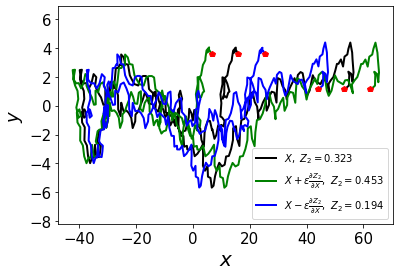

In [25]:
X_Tra1=pd.DataFrame(tra)
fig = plt.figure()
#ax1 = plt.axes(projection='3d')
j=0
x1 = tra[3*j,:] 
y1 =tra[3*j+1,:]
z1 = tra[3*j+2,:]


x2 = tra_per_add[3*j,:]#*ex_std+ex_mean
y2 =tra_per_add[3*j+1,:]
z2 = tra_per_add[3*j+2,:] 

x3 = tra_per_minus[3*j,:]#*ex_std+ex_mean
y3 =tra_per_minus[3*j+1,:]
z3 = tra_per_minus[3*j+2,:] 
fig = plt.figure()
#ax=plt.gca()
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
plt.plot(x1,y1,'-k', label='$X,~Z_2='+str(round(neural_low_np(tra1, weights_encoder, biases_encoder,weights_L)[0][0],3) )+'$', linewidth=2)
plt.plot(x2,y2,'-g', label=r'$X+\epsilon \frac{\partial Z_2}{\partial X},~Z_2='+str(round(neural_low_np(tra1_per_add, weights_encoder, biases_encoder,weights_L)[0][0],3) )+'$', linewidth=2)
plt.plot(x3,y3,'-b', label=r'$X-\epsilon \frac{\partial Z_2}{\partial X},~Z_2='+str(round(neural_low_np(tra1_per_minus, weights_encoder, biases_encoder,weights_L)[0][0],3) )+'$', linewidth=2)


plt.plot(x1[0],y1[0],'rp')
plt.plot(x1[299],y1[299],'rp')

plt.plot(x2[0],y2[0],'rp')
plt.plot(x2[299],y2[299],'rp')

plt.plot(x3[0],y3[0],'rp')
plt.plot(x3[299],y3[299],'rp')
plt.xlim((np.concatenate([x1,x2,x3],0)).min()-5,(np.concatenate([x1,x2,x3],0)).max()+5)
plt.ylim( -2.5+(np.concatenate([y1,y2,y3],0)).min(),2.5+(np.concatenate([y1,y2,y3],0)).max())
plt.legend()
plt.xlabel('$x$',fontsize='20')
#plt.ylabel('$Z_3$: second PCA coordinate',fontsize='18')
plt.ylabel('$y$ ',fontsize='18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('$Z_1='+str(Z1[i,j])+',Z_2='+str(Z2[i,j])+',Z_3='+str(Z3[i,j])+ '$')
plt.show()
fig.savefig('z2_pertubation.png',bbox_inches = 'tight',dpi=300)

<Figure size 432x288 with 0 Axes>

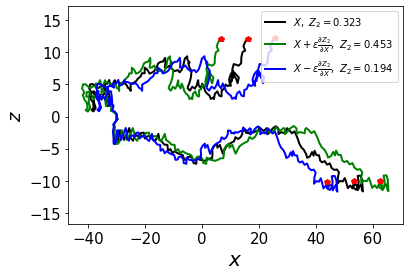

In [26]:
X_Tra1=pd.DataFrame(tra)
fig = plt.figure()
#ax1 = plt.axes(projection='3d')
j=0
x1 = tra[3*j,:] 
y1 =tra[3*j+1,:]
z1 = tra[3*j+2,:]


x2 = tra_per_add[3*j,:]#*ex_std+ex_mean
y2 =tra_per_add[3*j+1,:]
z2 = tra_per_add[3*j+2,:] 

x3 = tra_per_minus[3*j,:]#*ex_std+ex_mean
y3 =tra_per_minus[3*j+1,:]
z3 = tra_per_minus[3*j+2,:] 
fig = plt.figure()
#ax=plt.gca()
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
plt.plot(x1,z1,'-k', label='$X,~Z_2='+str(round(neural_low_np(tra1, weights_encoder, biases_encoder,weights_L)[0][0],3) )+'$', linewidth=2)
plt.plot(x2,z2,'-g', label=r'$X+\epsilon \frac{\partial Z_2}{\partial X},~Z_2='+str(round(neural_low_np(tra1_per_add, weights_encoder, biases_encoder,weights_L)[0][0],3) )+'$', linewidth=2)
plt.plot(x3,z3,'-b', label=r'$X-\epsilon \frac{\partial Z_2}{\partial X},~Z_2='+str(round(neural_low_np(tra1_per_minus, weights_encoder, biases_encoder,weights_L)[0][0],3) )+'$', linewidth=2)


plt.plot(x1[0],z1[0],'rp')
plt.plot(x1[299],z1[299],'rp')

plt.plot(x2[0],z2[0],'rp')
plt.plot(x2[299],z2[299],'rp')

plt.plot(x3[0],z3[0],'rp')
plt.plot(x3[299],z3[299],'rp')
plt.xlim((np.concatenate([x1,x2,x3],0)).min()-5,(np.concatenate([x1,x2,x3],0)).max()+5)
plt.ylim( -5+(np.concatenate([z1,z2,z3],0)).min(),5+(np.concatenate([z1,z2,z3],0)).max())
plt.legend()
plt.xlabel('$x$',fontsize='20')
#plt.ylabel('$Z_3$: second PCA coordinate',fontsize='18')
plt.ylabel('$z$ ',fontsize='18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('$Z_1='+str(Z1[i,j])+',Z_2='+str(Z2[i,j])+',Z_3='+str(Z3[i,j])+ '$')
plt.show()
fig.savefig('z2_pertubation_z.png',bbox_inches = 'tight',dpi=300)

In [27]:
x1[:,None].shape

(300, 1)

In [28]:
X_data_Z2=np.concatenate([x1[:,None],y1[:,None],z1[:,None]],1)
X_data_add_Z2=np.concatenate([x2[:,None],y2[:,None],z2[:,None]],1)
X_data_minus_Z2=np.concatenate([x3[:,None],y3[:,None],z3[:,None]],1)

In [29]:
X_data_minus_Z2.shape

(300, 3)

In [30]:
x1.mean(),x2.mean(),x3.mean(),y1.mean(),y2.mean(),y3.mean(),z1.mean(),z2.mean(),z3.mean()

(-2.2737367544323206e-15,
 2.3681670124157488e-07,
 -2.3681670654696063e-07,
 0.0,
 3.9847994533677895e-10,
 -3.9847994533677895e-10,
 0.0,
 5.572413404782614e-10,
 -5.572413404782614e-10)

$\frac{\partial Z}{\partial X}$

In [31]:
neural_low_np(tra1, weights_encoder, biases_encoder,weights_L),x1[0]-x1[-1]

(array([[0.32324757, 4.74909901]]), -37.236000000000004)

In [32]:
neural_low_np(tra1_per_add, weights_encoder, biases_encoder,weights_L),x2[0]-x2[-1]

(array([[0.45257634, 4.74909893]]), -55.87802404022217)

In [33]:
neural_low_np(tra1_per_minus, weights_encoder, biases_encoder,weights_L),x3[0]-x3[-1]

(array([[0.19391881, 4.74909909]]), -18.593975959777836)

In [49]:
epsilon=260
tra1_per_add3=tra1+epsilon*u_x_Z3/np.sqrt(  np.sum(u_x_Z3**2)  )
tra_per_add3=(np.reshape(tra1_per_add3,[300,3])).T

tra1_per_minus3=tra1-epsilon*u_x_Z3/np.sqrt(  np.sum(u_x_Z3**2)  )
tra_per_minus3=(np.reshape(tra1_per_minus3,[300,3])).T

<Figure size 432x288 with 0 Axes>

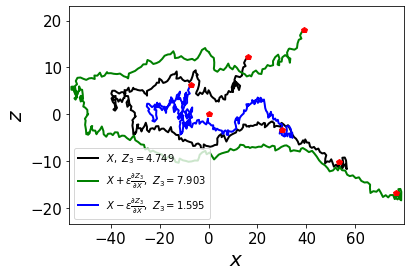

In [50]:
X_Tra1=pd.DataFrame(tra)
fig = plt.figure()
#ax1 = plt.axes(projection='3d')
j=0
x1 = tra[3*j,:] 
y1 =tra[3*j+1,:]
z1 = tra[3*j+2,:]


x2 = tra_per_add3[3*j,:]#*ex_std+ex_mean
y2 =tra_per_add3[3*j+1,:]
z2 = tra_per_add3[3*j+2,:] 

x3 = tra_per_minus3[3*j,:]#*ex_std+ex_mean
y3 =tra_per_minus3[3*j+1,:]
z3 = tra_per_minus3[3*j+2,:] 
fig = plt.figure()
# ax=plt.gca()
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
plt.plot(x1,z1,'-k', label='$X,~Z_3='+str(round(neural_low_np(tra1, weights_encoder, biases_encoder,weights_L)[0][1],3) )+'$', linewidth=2)
plt.plot(x2,z2,'-g', label=r'$X+\epsilon \frac{\partial Z_3}{\partial X},~Z_3='+str(round(neural_low_np(tra1_per_add3, weights_encoder, biases_encoder,weights_L)[0][1],3) )+'$', linewidth=2)
plt.plot(x3,z3,'-b', label=r'$X-\epsilon \frac{\partial Z_3}{\partial X},~Z_3='+str(round(neural_low_np(tra1_per_minus3, weights_encoder, biases_encoder,weights_L)[0][1],3) )+'$', linewidth=2)
plt.plot(x1[0],z1[0],'rp')
plt.plot(x1[299],z1[299],'rp')

plt.plot(x2[0],z2[0],'rp')
plt.plot(x2[299],z2[299],'rp')
plt.plot(0,0,'rp')
plt.plot(x3[0],z3[0],'rp')
plt.plot(x3[299],z3[299],'rp')
plt.xlim((np.concatenate([x1,x2,x3],0)).min()-1,(np.concatenate([x1,x2,x3],0)).max()+1)
plt.ylim( -5+(np.concatenate([z1,z2,z3],0)).min(),5+(np.concatenate([z1,z2,z3],0)).max())
plt.legend()
plt.xlabel('$x$',fontsize='20')
#plt.ylabel('$Z_3$: second PCA coordinate',fontsize='18')
plt.ylabel('$z$ ',fontsize='20')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('$Z_1='+str(Z1[i,j])+',Z_2='+str(Z2[i,j])+',Z_3='+str(Z3[i,j])+ '$')
plt.show()
fig.savefig('z3_pertubation_z.png',bbox_inches = 'tight',dpi=300)

In [ ]:
7.903,1.595,4.749

In [51]:
X_data_Z3=np.concatenate([x1[:,None],y1[:,None],z1[:,None]],1)
X_data_add_Z3=np.concatenate([x2[:,None],y2[:,None],z2[:,None]],1)
X_data_minus_Z3=np.concatenate([x3[:,None],y3[:,None],z3[:,None]],1)

In [52]:
sample_list = {"X_data_Z2": X_data_Z2, "X_data_add_Z2": X_data_add_Z2,"X_data_minus_Z2":X_data_minus_Z2,"X_data_Z3": X_data_Z3, "X_data_add_Z3": X_data_add_Z3,"X_data_minus_Z3":X_data_minus_Z3}
file_name = 'Z2_Z3.pkl'
open_file = open(file_name, "wb")
pickle.dump(sample_list, open_file)
open_file.close()

In [53]:
np.savetxt('X_data_Z2.txt',np.array(X_data_Z2),fmt='%10.5e')
np.savetxt('X_data_add_Z2.txt',np.array(X_data_add_Z2),fmt='%10.5e')
np.savetxt('X_data_minus_Z2.txt',np.array(X_data_minus_Z2),fmt='%10.5e')
np.savetxt('X_data_Z3.txt',np.array(X_data_Z3),fmt='%10.5e')
np.savetxt('X_data_add_Z3.txt',np.array(X_data_add_Z3),fmt='%10.5e')
np.savetxt('X_data_minus_Z3.txt',np.array(X_data_minus_Z3),fmt='%10.5e')

$X+\epsilon \nabla_X(Z)$

In [64]:
neural_low_np(tra1, weights_encoder, biases_encoder,weights_L)[0][1]

4.749099007174898

In [65]:
round(neural_low_np(tra1, weights_encoder, biases_encoder,weights_L)[0][1], 2)  

4.75